# CNN
## Info
```
Name : Shreyas Nayak
240911006
Accuracy : 94.41%
```

In [38]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten , Dropout

## Data Processing

In [2]:
labels = ['Ballerina_Cappuccina',
          'Bombardino_Crocodilo',
          'Brr_Brr_Patapim',
          'Lirali_Larila',
          'Tralalero_Tralala',
          'Tung_Tung_Tung..x3_Sahur'
         ]


In [3]:
labels = ['Bombardino_Crocodilo',
          'Brr_Brr_Patapim',
          'Lirali_Larila',
          'Tralalero_Tralala',
          'Tung_Tung_Tung..x3_Sahur'
         ]


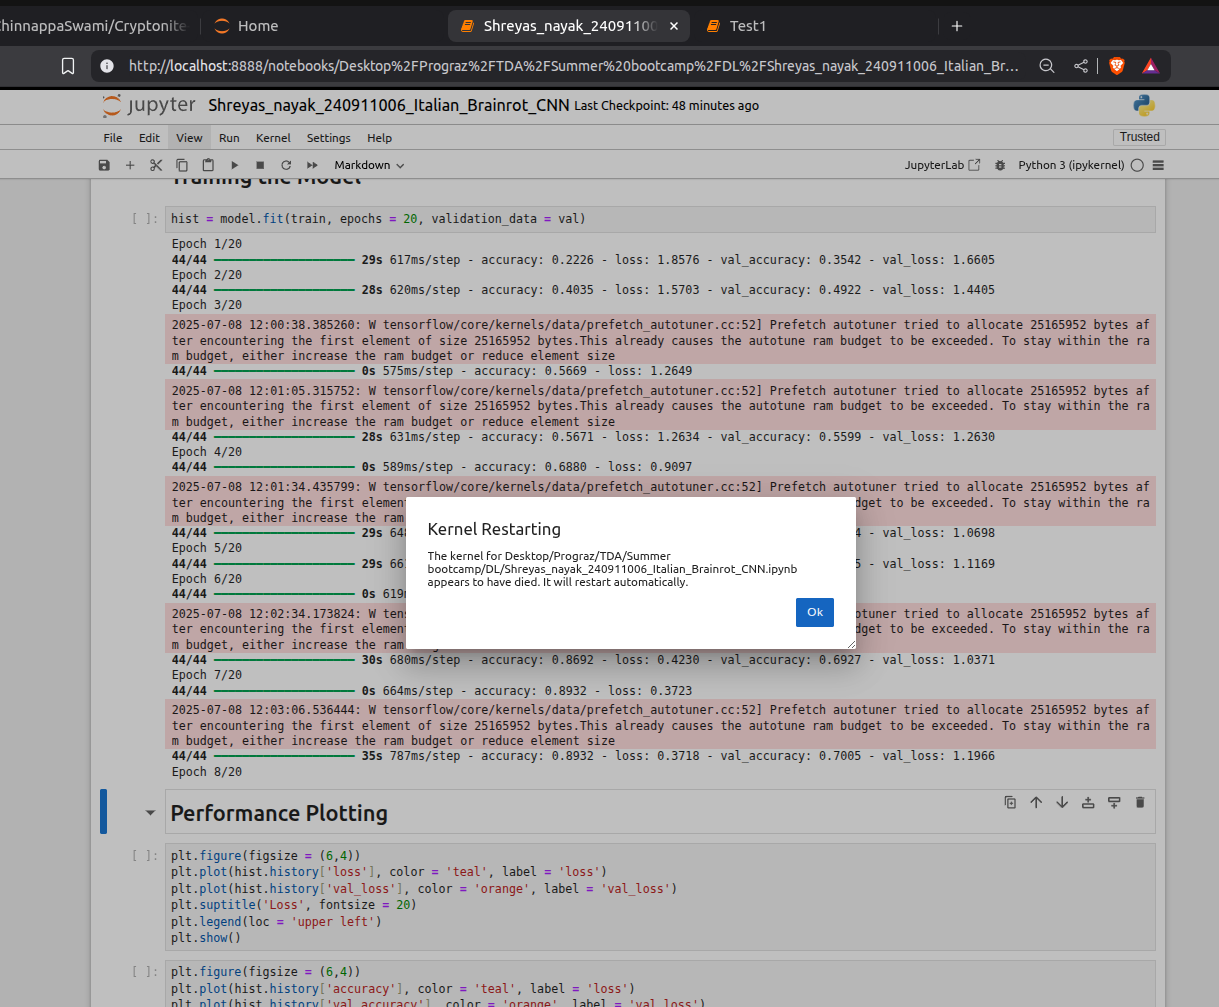
```
I am sry My laptop could not handle the CNN so decreased the no of labels
Also changed most of the parameters.
resized to 128 128
```

In [4]:
for label in os.listdir('Data'):
    for img in os.listdir(os.path.join('Data', label)):
        img_path = os.path.join('Data', label, img)
        tip = imghdr.what(img_path)
        if tip not in ['jpeg', 'jpg', 'bmp', 'png']:
            print("image getting removed")
            os.remove(img_path)

```
Images like with link shortcut or unavailable ones or which are not readable and deleted from the file completely
```

In [5]:
data = tf.keras.utils.image_dataset_from_directory('Data',image_size=(128, 128))

Found 1744 files belonging to 5 classes.


2025-07-08 12:24:01.178652: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


```
data holds 
(image_tensor, label_tensor)
```

In [6]:
data_it = data.as_numpy_iterator()
batch = data_it.next()
batch[0].shape

(32, 128, 128, 3)

```
Takes 32 images at once while traainig the model for efficiancy
There are 63 batches
as 1996/32 = 62.375 == 63
```

In [7]:
n = len(data)
n

55

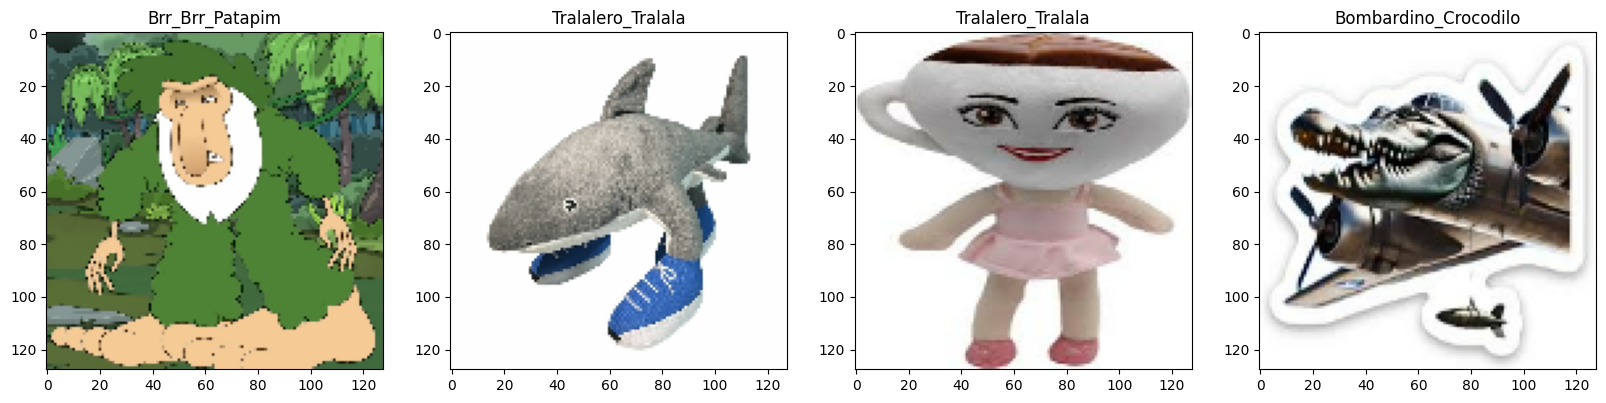

In [8]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(labels[batch[1][idx]])

In [9]:
data = data.map(lambda x, y: (x/255, y))

In [10]:
scaled_it = data.as_numpy_iterator()

In [11]:
scaled_batch = scaled_it.next()

```
Normalized by dividing all pixels by 255 
```

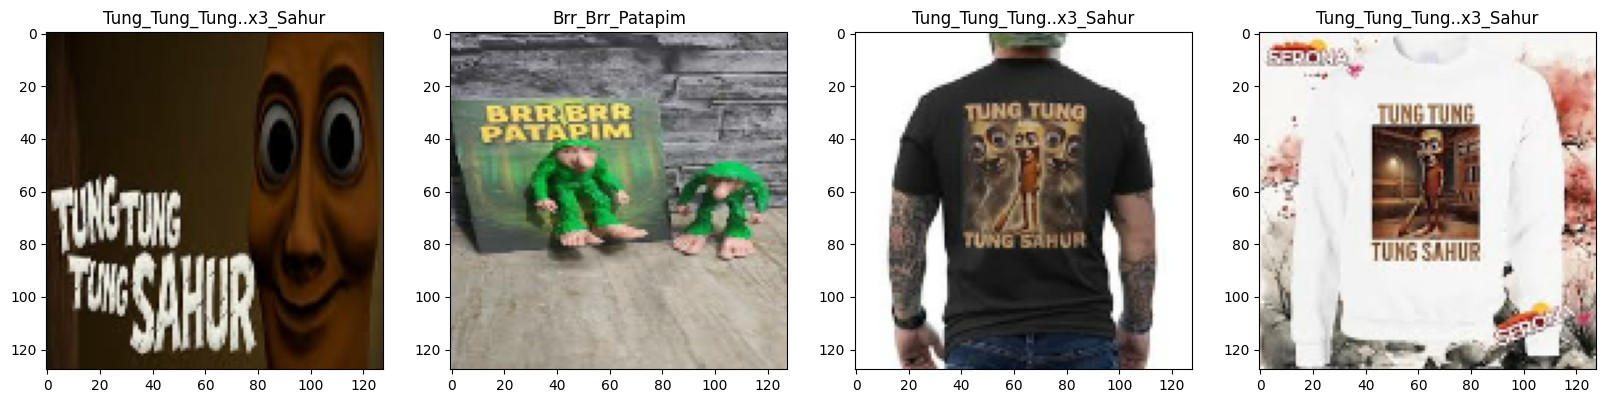

In [12]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(labels[scaled_batch[1][idx]])

## Splitting

In [13]:
tr_size = int(n * 0.7)
v_size = int(n * 0.2)
te_size = n - tr_size - v_size

In [14]:
train = data.take(tr_size)
val = data.skip(tr_size).take(v_size)
test = data.skip(tr_size + v_size).take(te_size)

## My Model

In [19]:
model = Sequential([
    Input(shape=(128,128, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

In [20]:
model.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,693,718 (14.09 MB)

 Trainable params: 3,693,718 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [22]:
hist = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.1843 - loss: 2.2304 - val_accuracy: 0.2415 - val_loss: 1.5980
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.3244 - loss: 1.5442 - val_accuracy: 0.4062 - val_loss: 1.4209
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.4660 - loss: 1.3386 - val_accuracy: 0.5284 - val_loss: 1.2487
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.5987 - loss: 1.0550 - val_accuracy: 0.5568 - val_loss: 1.2525
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.6921 - loss: 0.8963 - val_accuracy: 0.5938 - val_loss: 1.1074
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.7785 - loss: 0.6587

2025-07-08 12:25:21.640238: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 6291584 bytes after encountering the first element of size 6291584 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.7781 - loss: 0.6595 - val_accuracy: 0.6307 - val_loss: 1.0669
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.7903 - loss: 0.5792 - val_accuracy: 0.6932 - val_loss: 0.9684
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8671 - loss: 0.4486

2025-07-08 12:25:40.089221: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 6291584 bytes after encountering the first element of size 6291584 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.8668 - loss: 0.4489 - val_accuracy: 0.6705 - val_loss: 1.0527
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.8726 - loss: 0.4046 - val_accuracy: 0.6960 - val_loss: 0.9488
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.9078 - loss: 0.2809 - val_accuracy: 0.6989 - val_loss: 0.9430
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.9113 - loss: 0.2703 - val_accuracy: 0.7642 - val_loss: 0.8224
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - accuracy: 0.9309 - loss: 0.2352 - val_accuracy: 0.7557 - val_loss: 0.8611
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.9346 - loss: 0.2141 - val_accuracy: 0.7472 - val_loss: 0.9738
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.9383 - loss: 0.2098 - val_accuracy: 0.7386 - val_loss: 0.8614
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.9423 - loss: 0.1902 - val_accuracy: 0.7330 

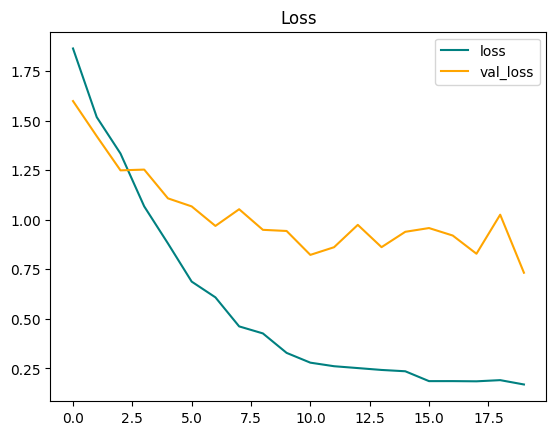

In [43]:
plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

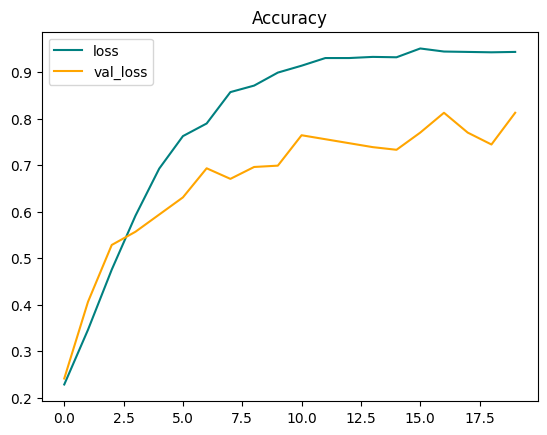

In [42]:
plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_loss')
plt.title('Accuracy')
plt.legend()
plt.show()

## Testing

In [27]:
test_loss, test_accuracy = model.evaluate(test)
print(f" Test Accuracy: " ,test_accuracy*100)
print(f" Test Loss:",test_loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7756 - loss: 0.9234
 Test Accuracy:  76.13636255264282
 Test Loss: 0.9502853751182556


2025-07-08 12:32:11.454036: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 6291584 bytes after encountering the first element of size 6291584 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


In [34]:
img = cv2.imread('Trale_test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

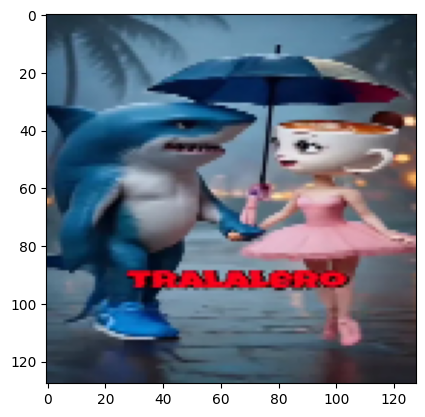

In [35]:
resize = tf.image.resize(img, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [37]:
labels[np.argmax(yhat)]

'Tralalero_Tralala'